In [1]:
import numpy as np

from src.environments import GridWorldEnv
from src.agents.ql import QLearning, FHQLearning
from src.agents.dp import BackwardPropagation, FrontPolicyImprovement, BackPolicyImprovement
from src.utils import Discretizer
from src.trainer import run_experiment
from src.plots import plot_gridworld

import numpy as np
import matplotlib.pyplot as plt
import tensorly as tl
from tensorly.decomposition import parafac
from src.models import PARAFAC

from itertools import product

import torch
from tensorly.tenalg import khatri_rao


In [2]:
# GridWorld

ALPHA_Q = 0.9
ALPHA_TLR = 0.001
GAMMA = 0.99
E = 50_000
H = 5
EPS = 1.0
EPS_DECAY = 0.9999
K = 8
SCALE = 0.1

ENV = GridWorldEnv()

DISCRETIZER = Discretizer(
    min_points_states=[0, 0],
    max_points_states=[4, 4],
    bucket_states=[5, 5],
    min_points_actions=[0],
    max_points_actions=[3],
    bucket_actions=[4],
)

In [3]:


fhq_learner = FHQLearning(DISCRETIZER, ALPHA_Q, H)

_ = run_experiment(0, E, H, EPS, EPS_DECAY, ENV, fhq_learner)

mat_q = np.max(fhq_learner.Q, axis=3)[0].reshape(ENV.W, ENV.W)



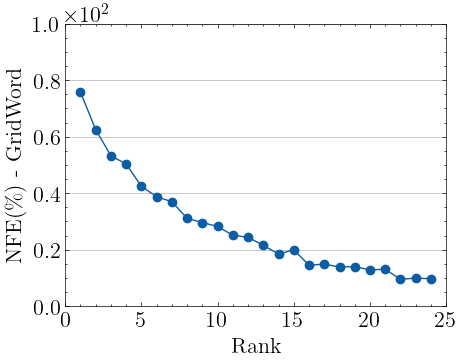

<Figure size 350x262.5 with 0 Axes>

In [4]:
from src.plots import plot_tensor_rank

plot_tensor_rank(fhq_learner.Q, None)

In [5]:
# Creamos la función Q
discretizer = Discretizer(
    min_points_states=[0, 0],
    max_points_states=[4, 4],
    bucket_states=[5, 5],
    min_points_actions=[0],
    max_points_actions=[3],
    bucket_actions=[4],
)
Q = np.zeros(
            np.concatenate([[H], discretizer.bucket_states, discretizer.bucket_actions])
        )

In [6]:
nS = ENV.nS
nA = ENV.nA
W = ENV.W
R = ENV.R
P = ENV.P

bp_learner = BackwardPropagation(H,nS,nA,R,P)
fpi_learner = FrontPolicyImprovement(H,nS,nA,R,P)
bpi_learner = BackPolicyImprovement(H,nS,nA,R,P)

_ = bp_learner.run()
_, error_fpi = fpi_learner.run()
_, error_bpi = bpi_learner.run()

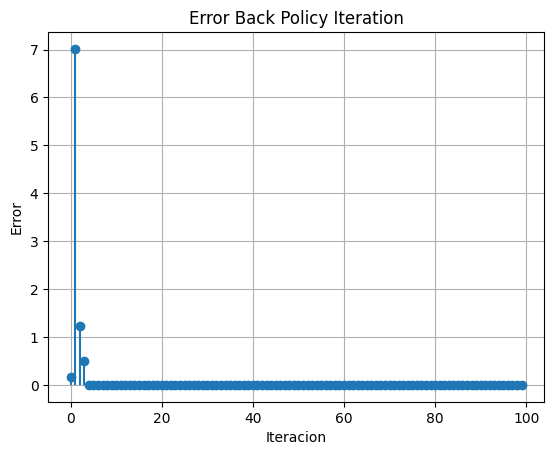

In [7]:
plt.stem(error_fpi, basefmt=" ")
plt.title("Error Back Policy Iteration")
plt.xlabel("Iteracion")
plt.ylabel("Error")
plt.grid(True)
plt.show()


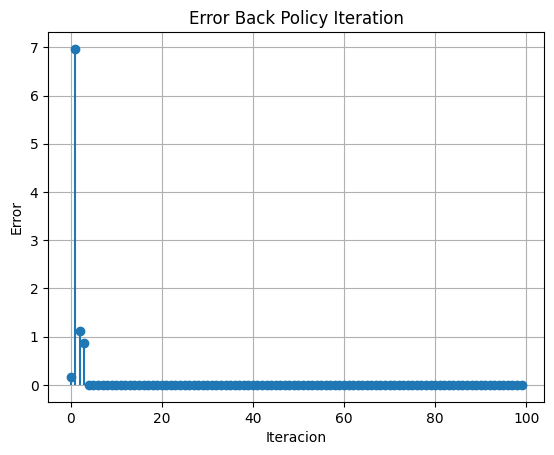

In [8]:
plt.stem(error_bpi, basefmt=" ")
plt.title("Error Back Policy Iteration")
plt.xlabel("Iteracion")
plt.ylabel("Error")
plt.grid(True)
plt.show()
